In [4]:
#INSTALAR BIBLIOTECAS
!pip install ucimlrepo

In [5]:
# Importación de bibliotecas
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, mean_squared_error, r2_score
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from matplotlib.colors import ListedColormap
from ucimlrepo import fetch_ucirepo

In [47]:
# --------------------------
# ABRIR Y UNIR BASES DE DATOS
# --------------------------
# fetch dataset
df = fetch_ucirepo(id=144)
# metadata
print(df.metadata)

# variable information
print(df.variables)
# Acceder a los datos dentro de la clave 'data'
# data (as pandas dataframes)
X = df.data.features
y = df.data.targets

print(X.head())
print(y.head())

# Unir X (features) e y (targets) horizontalmente
df = pd.concat([X, y], axis=1)

# Visualización inicial de los datos
print("Primeras 5 filas del dataset:")
print(df.head())

print("\nInformación del dataset:")
print(df.info())

{'uci_id': 144, 'name': 'Statlog (German Credit Data)', 'repository_url': 'https://archive.ics.uci.edu/dataset/144/statlog+german+credit+data', 'data_url': 'https://archive.ics.uci.edu/static/public/144/data.csv', 'abstract': 'This dataset classifies people described by a set of attributes as good or bad credit risks. Comes in two formats (one all numeric). Also comes with a cost matrix', 'area': 'Social Science', 'tasks': ['Classification'], 'characteristics': ['Multivariate'], 'num_instances': 1000, 'num_features': 20, 'feature_types': ['Categorical', 'Integer'], 'demographics': ['Other', 'Marital Status', 'Age', 'Occupation'], 'target_col': ['class'], 'index_col': None, 'has_missing_values': 'no', 'missing_values_symbol': None, 'year_of_dataset_creation': 1994, 'last_updated': 'Thu Aug 10 2023', 'dataset_doi': '10.24432/C5NC77', 'creators': ['Hans Hofmann'], 'intro_paper': None, 'additional_info': {'summary': 'Two datasets are provided.  the original dataset, in the form provided by

In [48]:

# --------------------------
# LIMPIEZA DE DATOS
# --------------------------

# 1. Verificar valores nulos en el dataset
print("Valores nulos en cada columna:")
print(df.isnull().sum())
#No hay valores nulos

Valores nulos en cada columna:
Attribute1     0
Attribute2     0
Attribute3     0
Attribute4     0
Attribute5     0
Attribute6     0
Attribute7     0
Attribute8     0
Attribute9     0
Attribute10    0
Attribute11    0
Attribute12    0
Attribute13    0
Attribute14    0
Attribute15    0
Attribute16    0
Attribute17    0
Attribute18    0
Attribute19    0
Attribute20    0
class          0
dtype: int64



Estadísticas descriptivas:
        Attribute2    Attribute5   Attribute8  Attribute11  Attribute13  \
count  1000.000000   1000.000000  1000.000000  1000.000000  1000.000000   
mean     20.903000   3271.258000     2.973000     2.845000    35.546000   
std      12.058814   2822.736876     1.118715     1.103718    11.375469   
min       4.000000    250.000000     1.000000     1.000000    19.000000   
25%      12.000000   1365.500000     2.000000     2.000000    27.000000   
50%      18.000000   2319.500000     3.000000     3.000000    33.000000   
75%      24.000000   3972.250000     4.000000     4.000000    42.000000   
max      72.000000  18424.000000     4.000000     4.000000    75.000000   

       Attribute16  Attribute18        class  
count  1000.000000  1000.000000  1000.000000  
mean      1.407000     1.155000     1.300000  
std       0.577654     0.362086     0.458487  
min       1.000000     1.000000     1.000000  
25%       1.000000     1.000000     1.000000  
50%       1.00

<Figure size 1200x800 with 0 Axes>

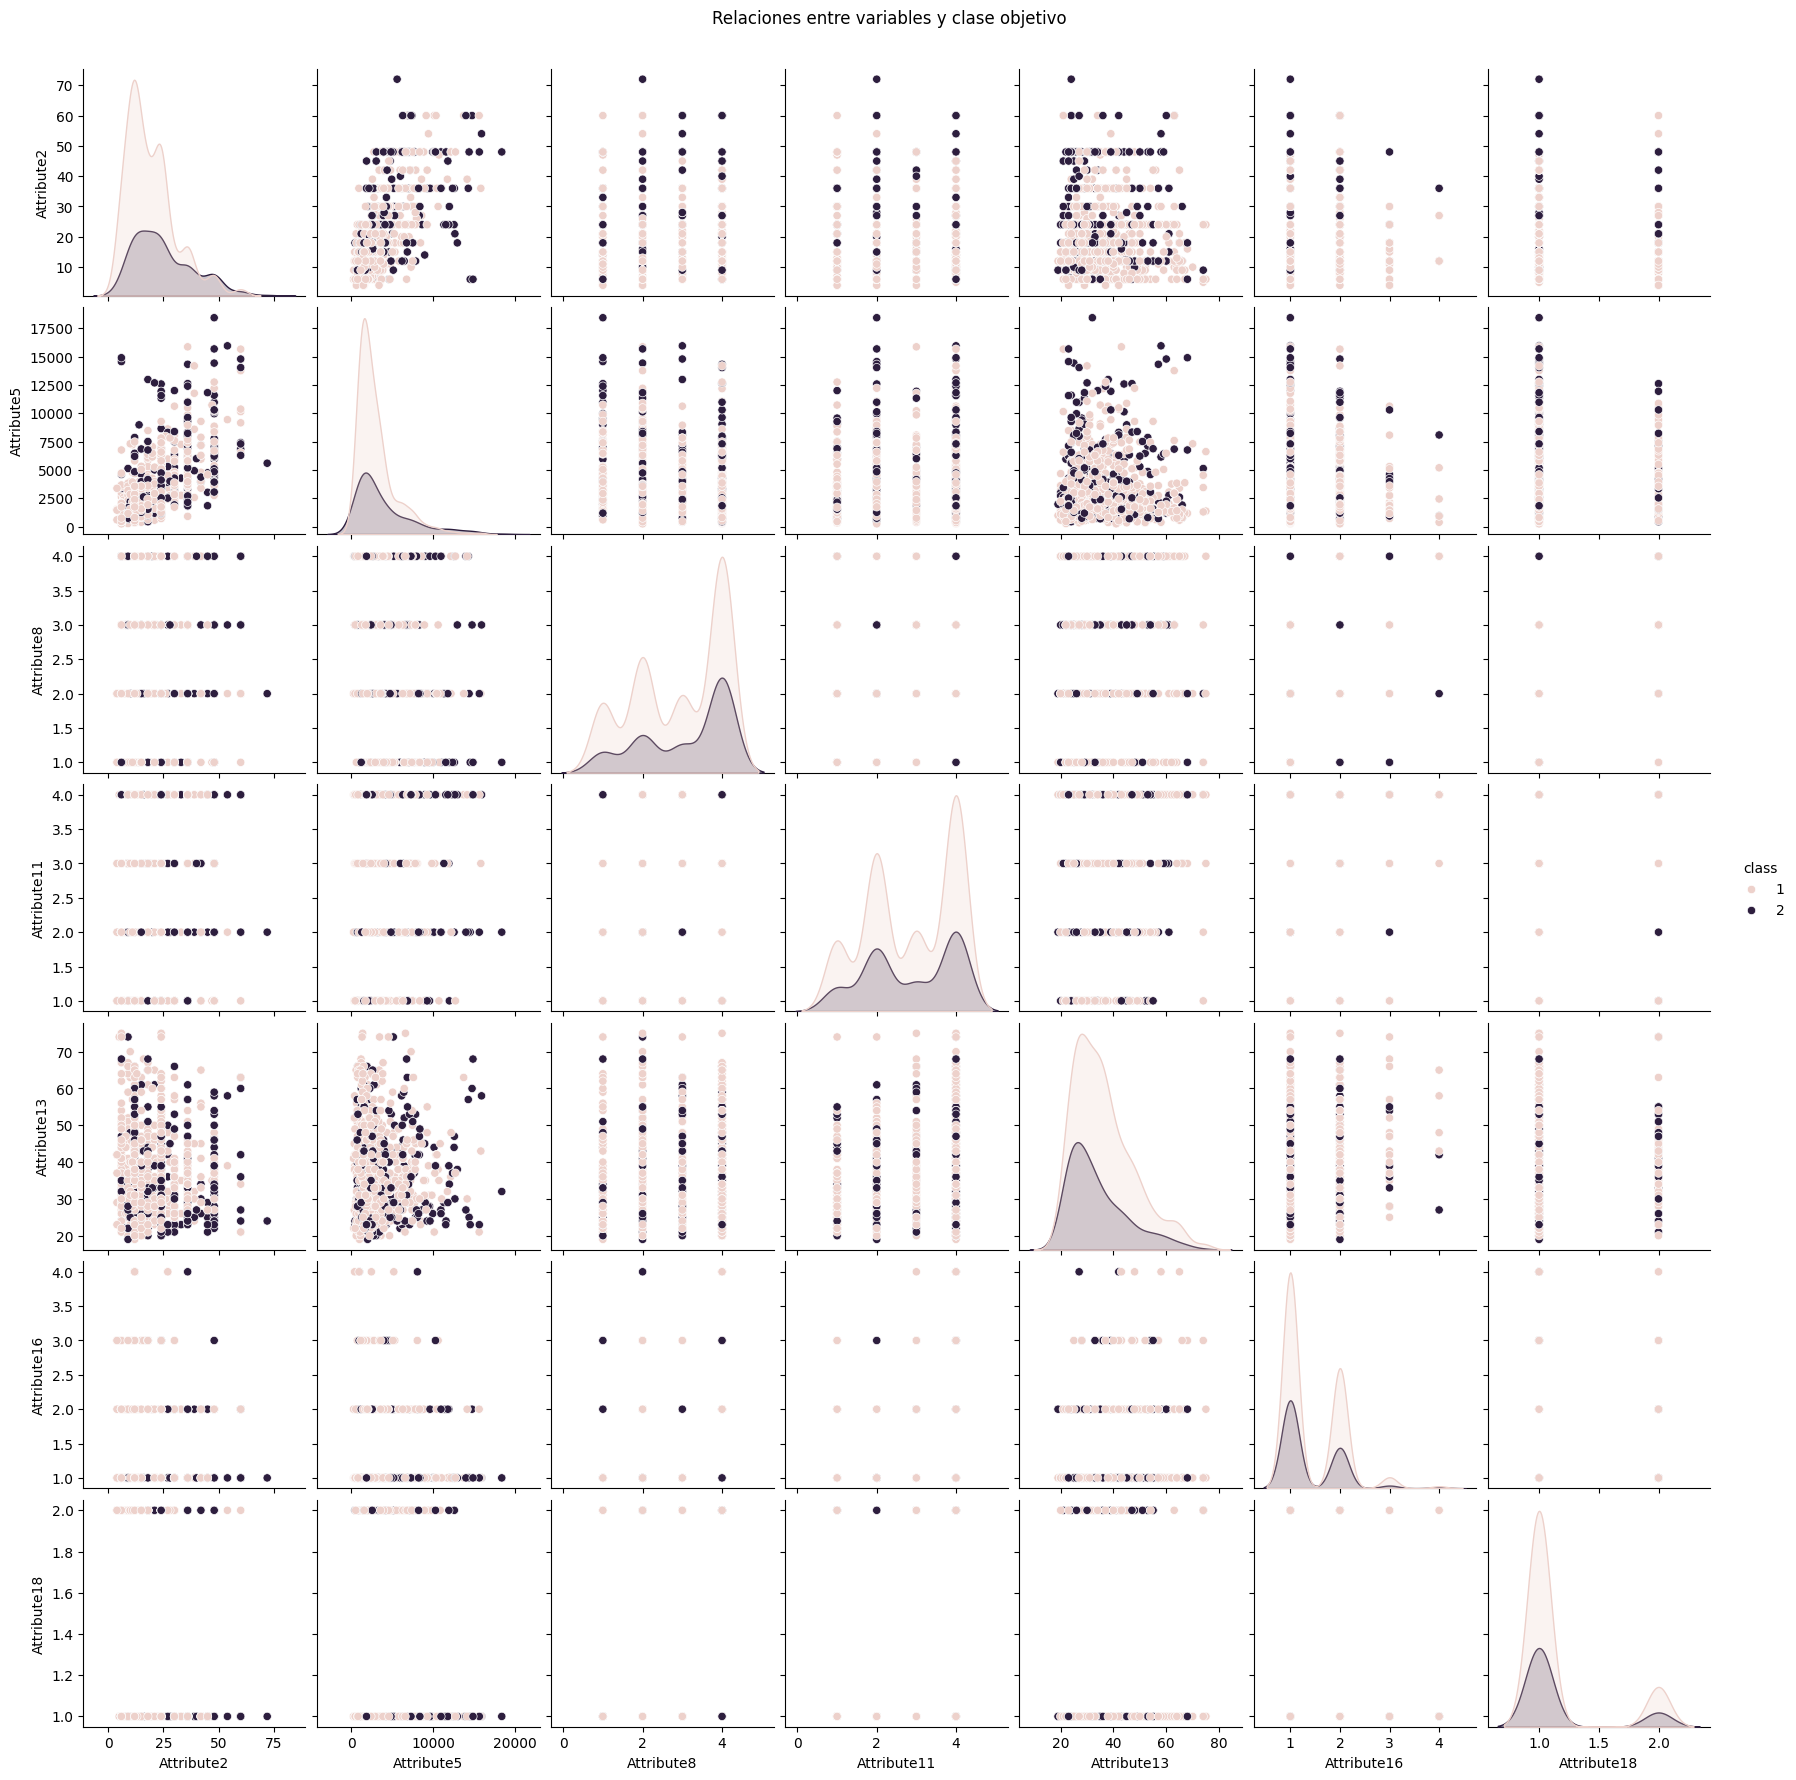

In [49]:
# --------------------------
# ANÁLISIS EXPLORATORIO DE DATOS (EDA)
# --------------------------
print("\nEstadísticas descriptivas:")
print(df.describe())

# Visualización de correlaciones
plt.figure(figsize=(12, 8))
sns.pairplot(df, hue='class')
plt.suptitle('Relaciones entre variables y clase objetivo', y=1.02)
plt.savefig('pairplot.png')  # Guardar figura para referencia
plt.show()

Valores atipicos en las variables Attribute2, Attribute5 y Attribute13


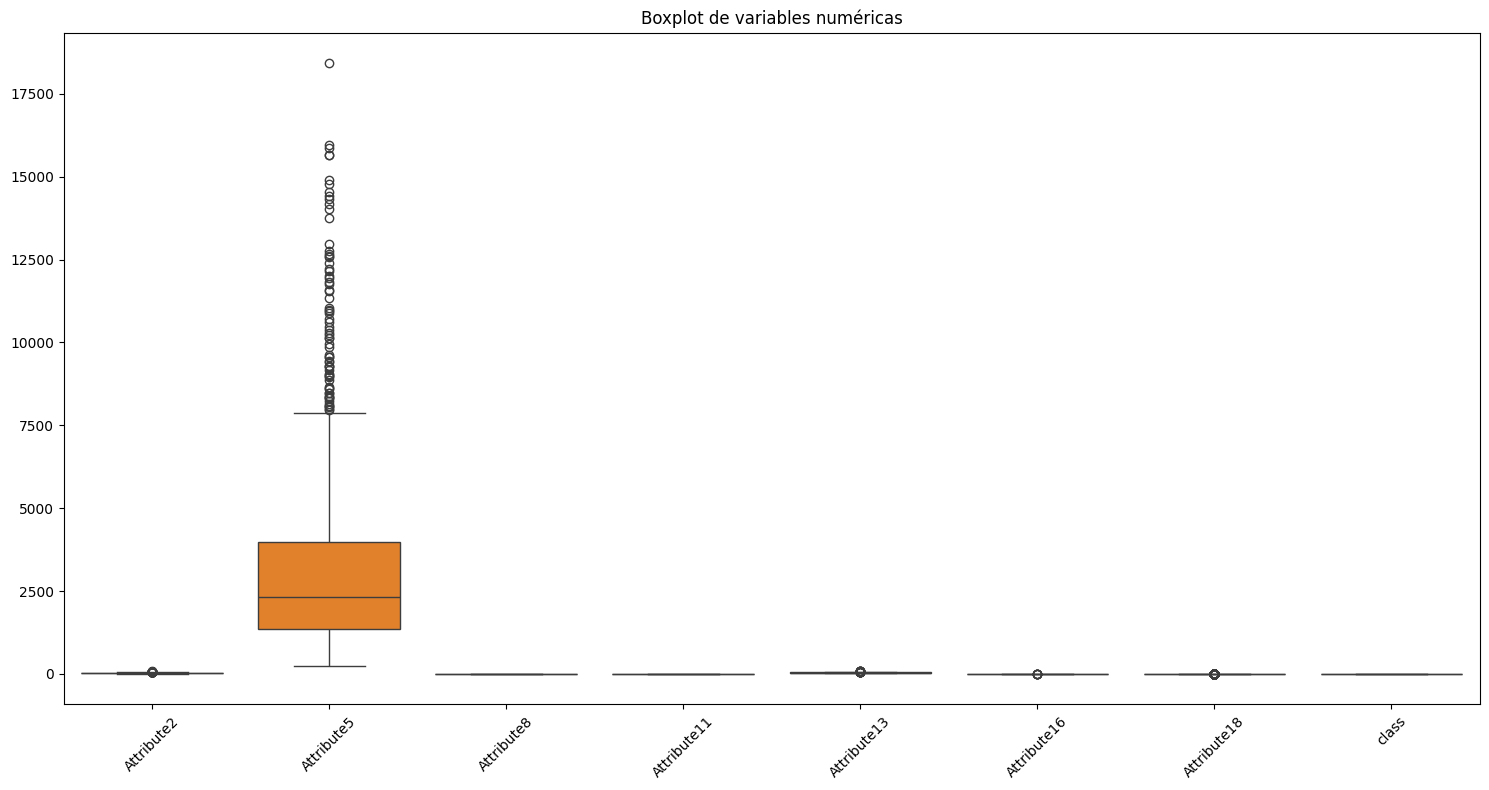

In [50]:
# --------------------------
# DETECCIÓN VALORES ATIPICOS
# --------------------------

# Seleccionar solo las columnas numéricas
numeric_columns = df.select_dtypes(include=['int64', 'float64']).columns

print("Valores atipicos en las variables Attribute2, Attribute5 y Attribute13")
# Crear boxplots en una sola figura
plt.figure(figsize=(15, 8))
sns.boxplot(data=df[numeric_columns])
plt.xticks(rotation=45)
plt.title('Boxplot de variables numéricas')
plt.tight_layout()
plt.show()

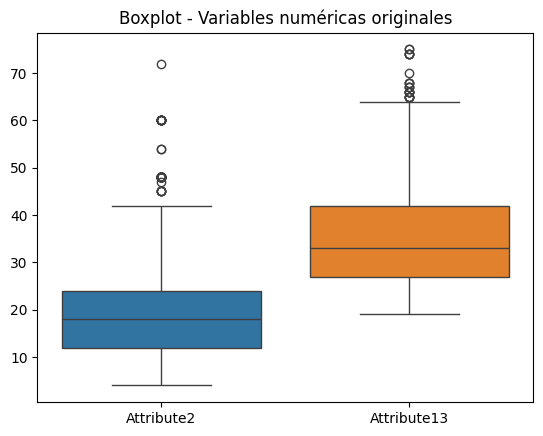

In [51]:
#Valores atipicos en Attribute2 y Attribute13
valores_atipicos = ['Attribute2', 'Attribute13']
sns.boxplot(data=df[valores_atipicos])
plt.title('Boxplot - Variables numéricas originales')
plt.show()

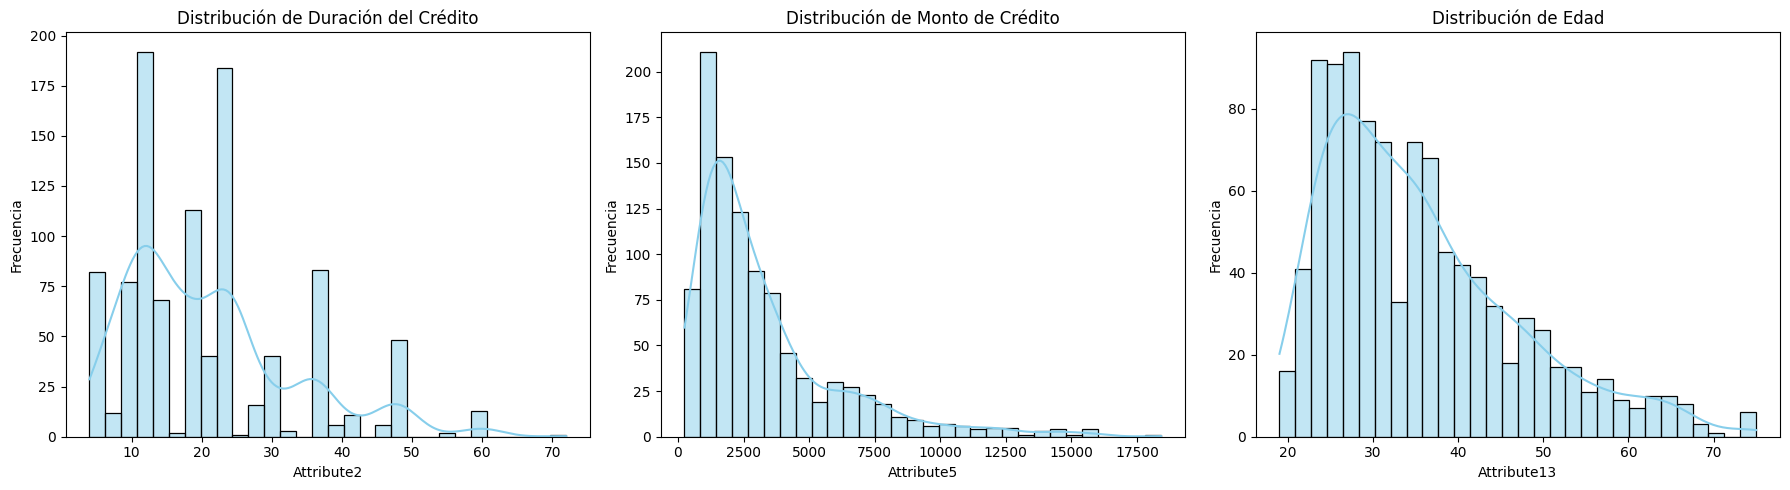

In [52]:
# Crear una figura con 3 subplots (uno para cada variable)
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

# Lista de variables originales con valores atípicos
variables = ['Attribute2', 'Attribute5', 'Attribute13']
titulos = ['Duración del Crédito', 'Monto de Crédito', 'Edad']

# Graficar cada variable como histograma con curva de densidad
for i, var in enumerate(variables):
    sns.histplot(df[var], kde=True, bins=30, ax=axes[i], color='skyblue')
    axes[i].set_title(f'Distribución de {titulos[i]}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Frecuencia')

plt.tight_layout()
plt.show()


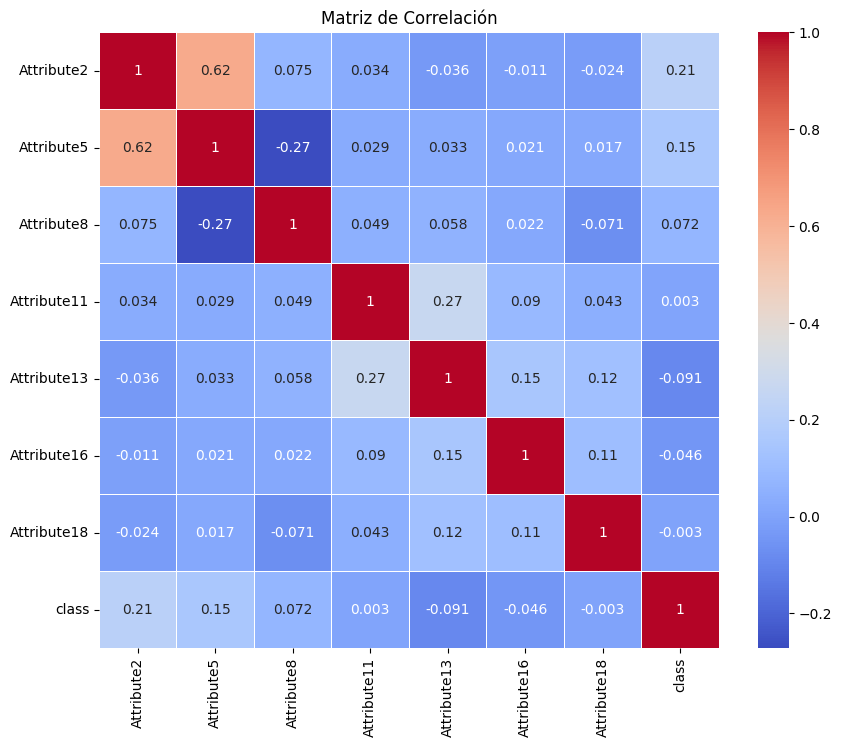

In [53]:
# Matriz de correlación (solo con columnas numéricas)
plt.figure(figsize=(10, 8))
# Seleccionamos solo columnas numéricas para la correlación
numeric_df = df.select_dtypes(include=['int64', 'float64'])
correlation = numeric_df.corr()
sns.heatmap(correlation, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Matriz de Correlación')
plt.savefig('correlation_matrix.png')
plt.show()

In [54]:
# --------------------------
# PREPROCESAMIENTO
# --------------------------

# CORRECCION VALORES ATIPICOS
# Crear categorías numéricas del 1 al 5 según rangos de duracion de credito, monto de crédito y edad
# Definición de los tramos personalizados para cada variable
bin_settings = {
    'Attribute2': {
        'bins': [0, 12, 24, 36, 48, df['Attribute2'].max()],
        'labels': [1, 2, 3, 4, 5]
    },
        'Attribute5': {
        'bins': [0, 1000, 3000, 6000, 10000, df['Attribute5'].max()],
        'labels': [1, 2, 3, 4, 5]
    },
    'Attribute13': {
        'bins': [18, 25, 35, 45, 55, df['Attribute13'].max()],
        'labels': [1, 2, 3, 4, 5]
    }
}

# Aplicar categorización a cada variable
for col, settings in bin_settings.items():
    df[col] = pd.cut(df[col],
                     bins=settings['bins'],
                     labels=settings['labels'],
                     include_lowest=True).astype(int)
    # Mostrar distribución
    print(f"\nDistribución de {col}:")
    print(df[col].value_counts().sort_index())


Distribución de Attribute2:
Attribute2
1    359
2    411
3    143
4     71
5     16
Name: count, dtype: int64

Distribución de Attribute5:
Attribute5
1    116
2    504
3    231
4    109
5     40
Name: count, dtype: int64

Distribución de Attribute13:
Attribute13
1    190
2    398
3    226
4    115
5     71
Name: count, dtype: int64


In [55]:
# Cambiar nombres de las columnas (primero)
from sklearn.preprocessing import OrdinalEncoder
df.rename(columns={
    'Attribute1': 'CheckingStatus',
    'Attribute2': 'DurationMonths',
    'Attribute3': 'CreditHistory',
    'Attribute4': 'Purpose',
    'Attribute5': 'CreditAmount',
    'Attribute6': 'SavingsAccount',
    'Attribute7': 'EmploymentLength',
    'Attribute8': 'InstallmentRate',
    'Attribute9': 'PersonalStatus',
    'Attribute10': 'OtherDebtors',
    'Attribute11': 'ResidenceSince',
    'Attribute12': 'Property',
    'Attribute13': 'Age',
    'Attribute14': 'InstallmentPlans',
    'Attribute15': 'Housing',
    'Attribute16': 'ExistingCredits',
    'Attribute17': 'Job',
    'Attribute18': 'Dependents',
    'Attribute19': 'Telephone',
    'Attribute20': 'ForeignWorker',
    'class': 'Class'
}, inplace=True)

# Lista actualizada de columnas categóricas con los nuevos nombres
categorical_columns = [
    'CheckingStatus', 'CreditHistory', 'Purpose', 'SavingsAccount', 'EmploymentLength',
    'PersonalStatus', 'OtherDebtors', 'Property', 'InstallmentPlans', 'Housing',
    'Job', 'Telephone', 'ForeignWorker'
]

# Codificador ordinal
encoder = OrdinalEncoder()

# Codificar columnas cualitativas
df[categorical_columns] = encoder.fit_transform(df[categorical_columns])

# Verificar primeros resultados
print(df[categorical_columns].head())
print("\nInformación general del DataFrame:")
print(df.info())



   CheckingStatus  CreditHistory  Purpose  SavingsAccount  EmploymentLength  \
0             0.0            4.0      4.0             4.0               4.0   
1             1.0            2.0      4.0             0.0               2.0   
2             3.0            4.0      7.0             0.0               3.0   
3             0.0            2.0      3.0             0.0               3.0   
4             0.0            3.0      0.0             0.0               2.0   

   PersonalStatus  OtherDebtors  Property  InstallmentPlans  Housing  Job  \
0             2.0           0.0       0.0               2.0      1.0  2.0   
1             1.0           0.0       0.0               2.0      1.0  2.0   
2             2.0           0.0       0.0               2.0      1.0  1.0   
3             2.0           2.0       1.0               2.0      2.0  2.0   
4             2.0           0.0       3.0               2.0      2.0  2.0   

   Telephone  ForeignWorker  
0        1.0            0.0  
1 

In [56]:
# Lista de variables independientes (features renombradas)
feature_columns = [
    'CheckingStatus', 'DurationMonths', 'CreditHistory', 'Purpose',
    'CreditAmount', 'SavingsAccount', 'EmploymentLength', 'InstallmentRate',
    'PersonalStatus', 'OtherDebtors', 'ResidenceSince', 'Property',
    'Age', 'InstallmentPlans', 'Housing', 'ExistingCredits',
    'Job', 'Dependents', 'Telephone', 'ForeignWorker'
]

# Definir X e y con nombres descriptivos
X = df[feature_columns]
y = df['Class']

In [57]:
# Escalado de características
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# División en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.20, random_state=42)

print(f"Tamaño del conjunto de entrenamiento: {X_train.shape}")
print(f"Tamaño del conjunto de prueba: {X_test.shape}")

Tamaño del conjunto de entrenamiento: (800, 20)
Tamaño del conjunto de prueba: (200, 20)



MODELO 1: REGRESIÓN LOGÍSTICA

Matriz de Confusión (Regresión Logística):
[[126  15]
 [ 28  31]]


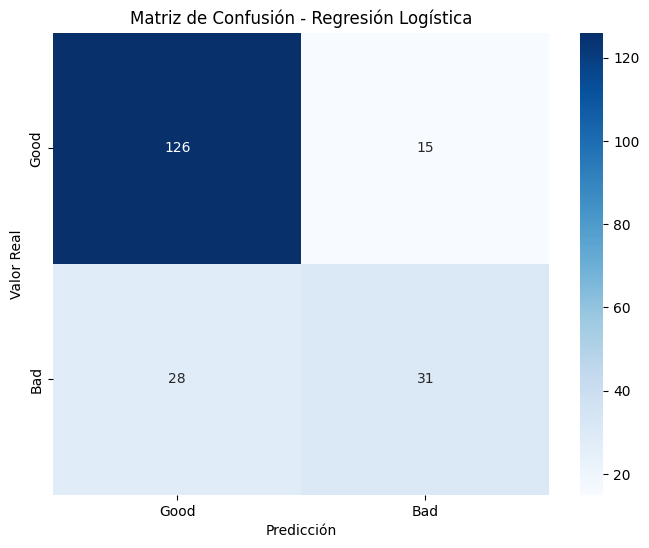


Reporte de Clasificación (Regresión Logística):
              precision    recall  f1-score   support

           1       0.82      0.89      0.85       141
           2       0.67      0.53      0.59        59

    accuracy                           0.79       200
   macro avg       0.75      0.71      0.72       200
weighted avg       0.78      0.79      0.78       200


Coeficientes del modelo de Regresión Logística:
Intercept: -1.1055
Coeficiente para CheckingStatus: -0.6914
Coeficiente para DurationMonths: 0.2027
Coeficiente para CreditHistory: -0.4254
Coeficiente para Purpose: -0.0704
Coeficiente para CreditAmount: 0.2356
Coeficiente para SavingsAccount: -0.2617
Coeficiente para EmploymentLength: -0.1651
Coeficiente para InstallmentRate: 0.2739
Coeficiente para PersonalStatus: -0.1785
Coeficiente para OtherDebtors: -0.1745
Coeficiente para ResidenceSince: 0.0643
Coeficiente para Property: 0.2170
Coeficiente para Age: -0.2974
Coeficiente para InstallmentPlans: -0.2303
Coeficiente

In [58]:
# --------------------------
# IMPLEMENTACION DE CLASIFICADORES
# --------------------------
# 4. Implementación de Regresión Logística
print("\n" + "="*50)
print("MODELO 1: REGRESIÓN LOGÍSTICA")
print("="*50)

# Entrenamiento del modelo
lr = LogisticRegression(random_state=42)
lr.fit(X_train, y_train)

# Predicciones
y_pred_lr = lr.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Regresión Logística):")
conf_matrix_lr = confusion_matrix(y_test, y_pred_lr)
print(conf_matrix_lr)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_lr, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Bad'],
            yticklabels=['Good', 'Bad'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Regresión Logística')
plt.savefig('confusion_matrix_lr.png')
plt.show()

print("\nReporte de Clasificación (Regresión Logística):")
print(classification_report(y_test, y_pred_lr))
# Coeficientes del modelo de Regresión Logística
print("\nCoeficientes del modelo de Regresión Logística:")
print(f"Intercept: {lr.intercept_[0]:.4f}")

# Recorrer los nombres de las columnas y los coeficientes
for feature, coef in zip(X.columns, lr.coef_[0]):
    print(f"Coeficiente para {feature}: {coef:.4f}")



MODELO 2: SUPPORT VECTOR MACHINE (SVM)

Matriz de Confusión (SVM):
[[123  18]
 [ 28  31]]


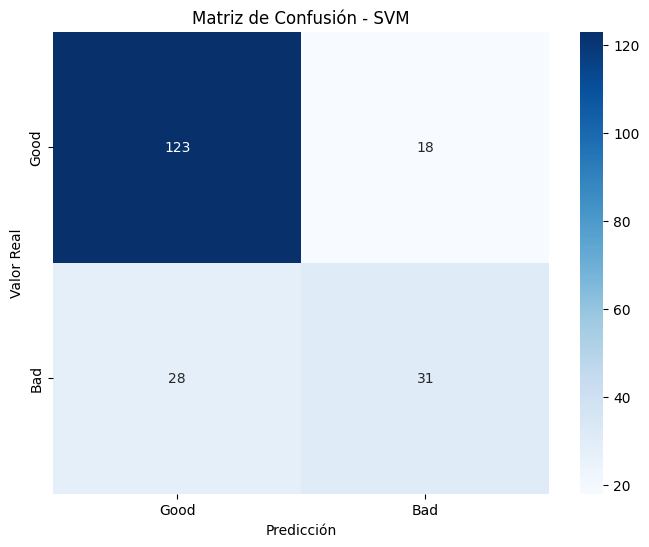


Reporte de Clasificación (SVM):
              precision    recall  f1-score   support

           1       0.81      0.87      0.84       141
           2       0.63      0.53      0.57        59

    accuracy                           0.77       200
   macro avg       0.72      0.70      0.71       200
weighted avg       0.76      0.77      0.76       200



In [60]:
# 5. Implementación de SVM (Support Vector Machine)
print("\n" + "="*50)
print("MODELO 2: SUPPORT VECTOR MACHINE (SVM)")
print("="*50)

# Entrenamiento del modelo
#'sigmoid', 'linear', 'poly', 'precomputed', 'rbf'
#The 'gamma' parameter of SVC must be a str among {'scale', 'auto'} or a float in the range [0.0, inf). Got 'scal' instead.
svm = SVC(kernel='rbf', C=10, gamma=0.01, random_state=42)
svm.fit(X_train, y_train)

# Predicciones
y_pred_svm = svm.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (SVM):")
conf_matrix_svm = confusion_matrix(y_test, y_pred_svm)
print(conf_matrix_svm)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_svm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Good', 'Bad'],
            yticklabels=['Good', 'Bad'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - SVM')
plt.savefig('confusion_matrix_svm.png')
plt.show()

print("\nReporte de Clasificación (SVM):")
print(classification_report(y_test, y_pred_svm))


MODELO 3: ÁRBOL DE DECISIÓN

Matriz de Confusión (Árbol de Decisión):
[[129  12]
 [ 44  15]]


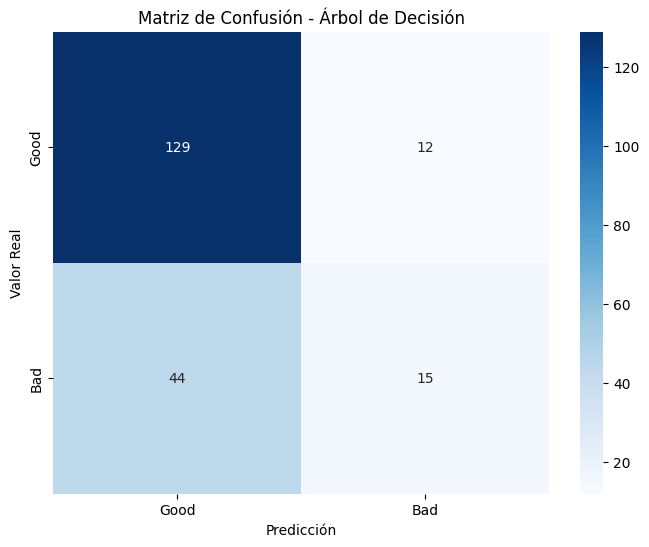


Reporte de Clasificación (Árbol de Decisión):
              precision    recall  f1-score   support

           1       0.75      0.91      0.82       141
           2       0.56      0.25      0.35        59

    accuracy                           0.72       200
   macro avg       0.65      0.58      0.59       200
weighted avg       0.69      0.72      0.68       200



In [61]:
# 6. Implementación de Árbol de Decisión
print("\n" + "="*50)
print("MODELO 3: ÁRBOL DE DECISIÓN")
print("="*50)

# Entrenamiento del modelo
tree = DecisionTreeClassifier(max_depth=4, random_state=42)
tree.fit(X_train, y_train)

# Predicciones
y_pred_tree = tree.predict(X_test)

# Evaluación
print("\nMatriz de Confusión (Árbol de Decisión):")
conf_matrix_tree = confusion_matrix(y_test, y_pred_tree)
print(conf_matrix_tree)

# Visualización de la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_tree, annot=True, fmt='d', cmap='Blues',
           xticklabels=['Good', 'Bad'],
            yticklabels=['Good', 'Bad'])
plt.xlabel('Predicción')
plt.ylabel('Valor Real')
plt.title('Matriz de Confusión - Árbol de Decisión')
plt.savefig('confusion_matrix_tree.png')
plt.show()

print("\nReporte de Clasificación (Árbol de Decisión):")
print(classification_report(y_test, y_pred_tree))


COMPARACIÓN DE MODELOS CON VALIDACIÓN CRUZADA
Regresión Logística: Recall promedio = 0.886, Desviación Estándar = 0.136
SVM: Recall promedio = 0.899, Desviación Estándar = 0.133
Árbol de Decisión: Recall promedio = 0.896, Desviación Estándar = 0.134

Resumen de validación cruzada:
                Modelo  Recall Promedio  Desviación Estándar
0  Regresión Logística         0.885714             0.135526
1                  SVM         0.898571             0.132934
2    Árbol de Decisión         0.895714             0.133791


<ipython-input-63-54d7699df130>:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Modelo', y='Recall Promedio', data=cv_df, palette='viridis')


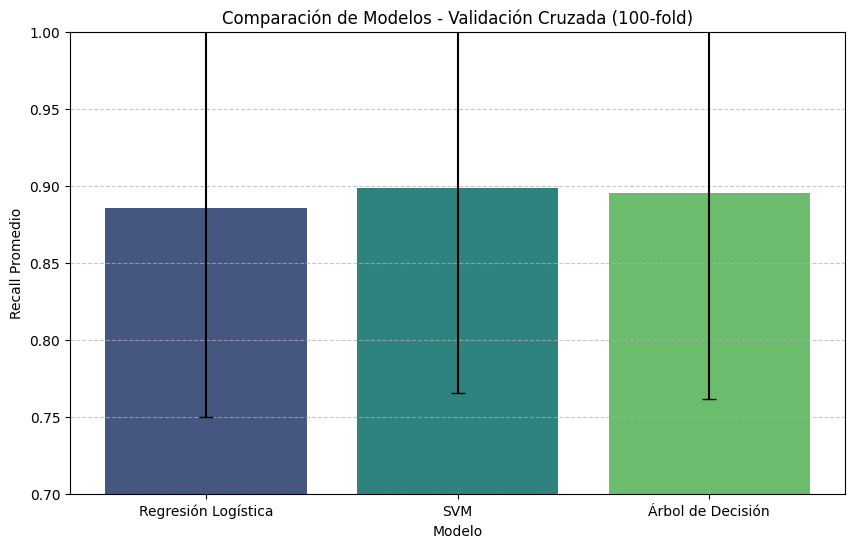

In [63]:
# 7. Comparación de modelos con validación cruzada
print("\n" + "="*50)
print("COMPARACIÓN DE MODELOS CON VALIDACIÓN CRUZADA")
print("="*50)

models = {
    'Regresión Logística': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='rbf', C=10, gamma=0.01, random_state=42),
    'Árbol de Decisión': DecisionTreeClassifier(max_depth=4, random_state=42)
}

# Lista para almacenar resultados
cv_results = []

for name, model in models.items():
    scores = cross_val_score(model, X_scaled, y, cv=100, scoring='recall')
    cv_results.append({
        'Modelo': name,
        'Recall Promedio': scores.mean(),
        'Desviación Estándar': scores.std(),
        'Scores': scores
    })
    print(f"{name}: Recall promedio = {scores.mean():.3f}, Desviación Estándar = {scores.std():.3f}")

# Visualización de resultados de validación cruzada
cv_df = pd.DataFrame(cv_results)[['Modelo', 'Recall Promedio', 'Desviación Estándar']]
print("\nResumen de validación cruzada:")
print(cv_df)

plt.figure(figsize=(10, 6))
sns.barplot(x='Modelo', y='Recall Promedio', data=cv_df, palette='viridis')
plt.errorbar(x=range(len(cv_df)), y=cv_df['Recall Promedio'],
             yerr=cv_df['Desviación Estándar'], fmt='none', color='black', capsize=5)
plt.title('Comparación de Modelos - Validación Cruzada (100-fold)')
plt.ylim(0.7, 1.0)  # Ajustar según los resultados
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.savefig('cross_validation_comparison.png')
plt.show()